## Compute distances between persistence diagrams

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import PIL

import persim
from persim import plot_diagrams, bottleneck, bottleneck_matching
from ripser import ripser, lower_star_img

In [2]:
activations = np.load('../data/activations4096.npy')

In [3]:
dgms = []
for i in range(len(activations)):
    dgm = lower_star_img(-activations[i])
    dgms.append(dgm)

# Compute bottleneck distance
Points with non-finite death time are ignored

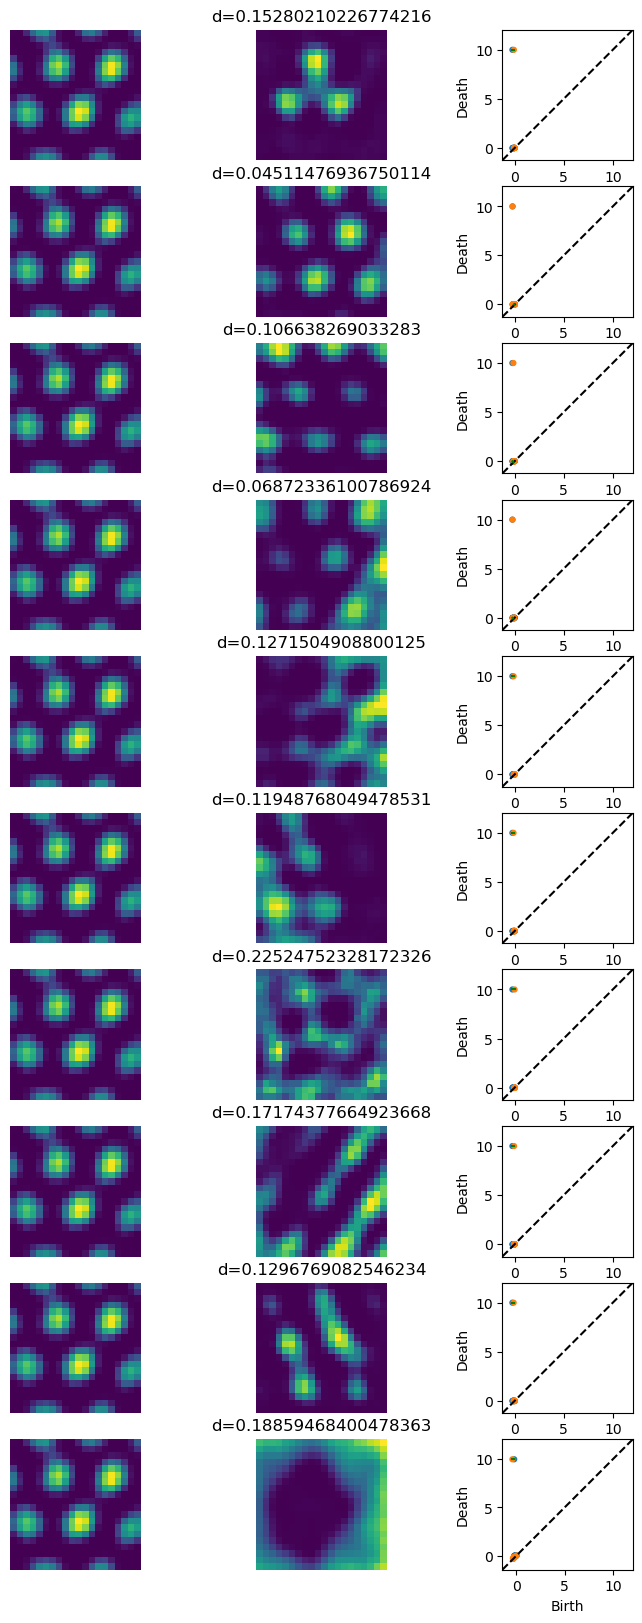

In [11]:
n_plot = 10
idxs=[0,110,310,510,710,910,1110,1310,3000,4000]
plt.figure(figsize=(9,2*n_plot))
for i in range(n_plot):
    distance_bottleneck, (matching, D) = bottleneck(dgms[8], dgms[idxs[i]] , matching=True)
    plt.subplot(n_plot,3,3*i+1)
    plt.imshow(activations[8])
    plt.axis('off')
    plt.subplot(n_plot,3,3*i+2)
    plt.imshow(activations[idxs[i]])
    plt.axis('off')
    plt.title('d='+str(distance_bottleneck))
    plt.subplot(n_plot,3,3*i+3)
    bottleneck_matching(dgms[8], dgms[idxs[i]], matching, D)
    plt.legend().set_visible(False)
plt.show()

# Compute sliced Wasserstein distance
You can't have infinite death-time points. Substitute value of death-time or ignore these points?

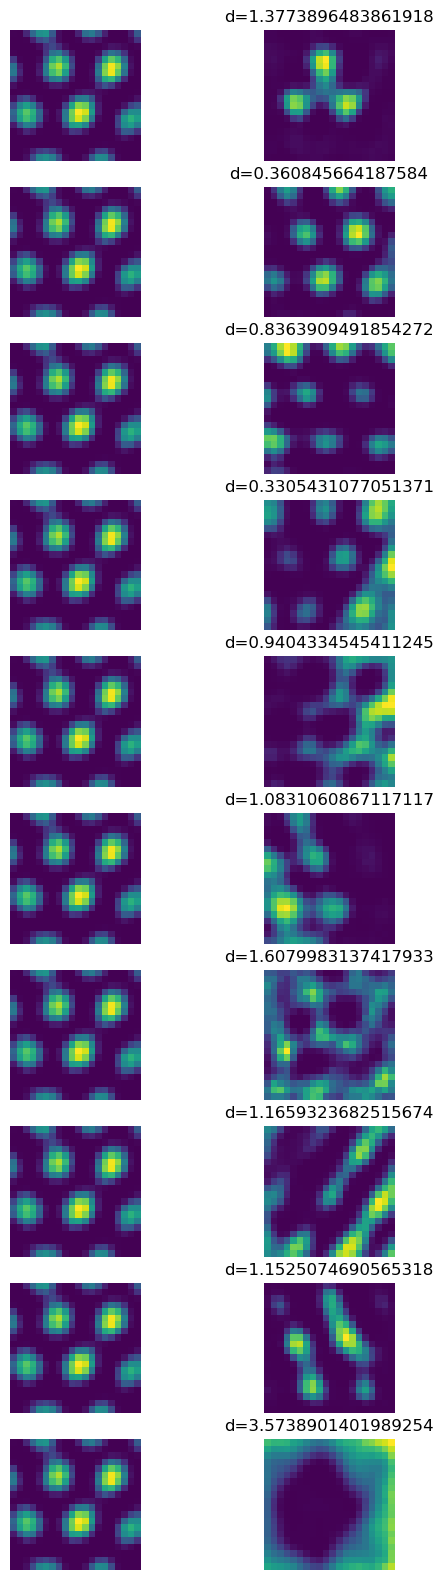

In [10]:
#Sliced Wasserstein distance
n_plot = 10
idxs=[0,110,310,510,710,910,1110,1310,3000,4000]
plt.figure(figsize=(6,2*n_plot))
dgm1 = dgms[8]
dgm1[-1,1] = 10
for i in range(n_plot):
    dgm2 = dgms[idxs[i]]
    dgm2[-1,1] = 10
    distance = persim.sliced_wasserstein(dgm1,dgm2)
    plt.subplot(n_plot,2,2*i+1)
    plt.imshow(activations[8])
    plt.axis('off')
    plt.subplot(n_plot,2,2*i+2)
    plt.imshow(activations[idxs[i]])
    plt.axis('off')
    plt.title('d='+str(distance))
plt.show()

# Compute heat kernel distance
How to deal with infinite death-time points?

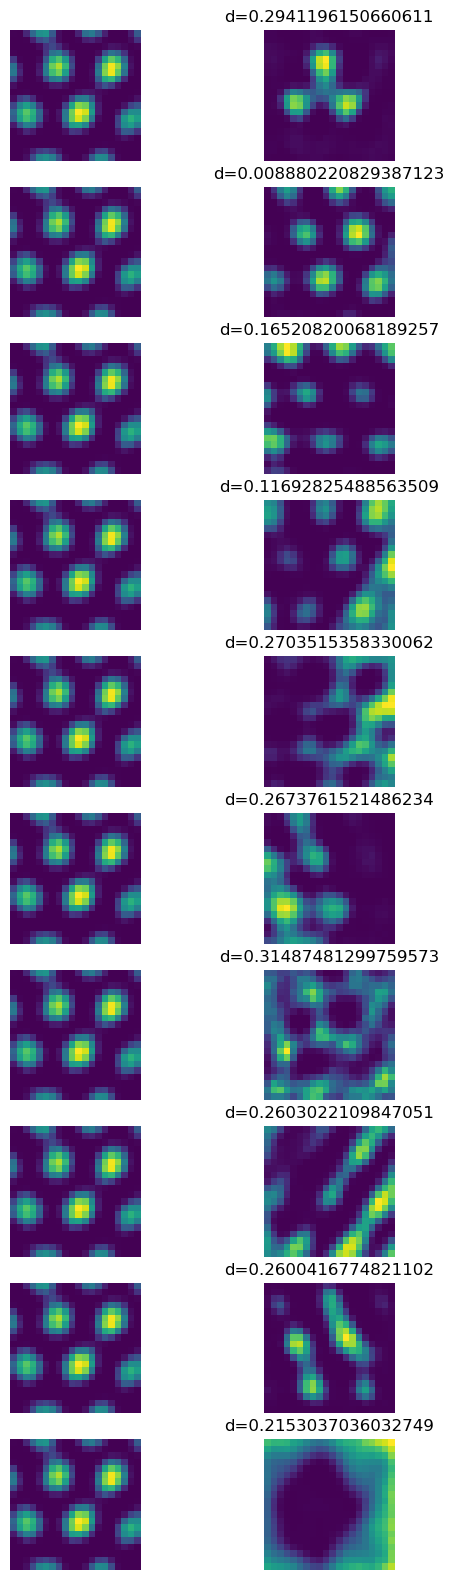

In [12]:
#Heat kernel distance
n_plot = 10
idxs=[0,110,310,510,710,910,1110,1310,3000,4000]
plt.figure(figsize=(6,2*n_plot))
dgm1 = dgms[8]
for i in range(n_plot):
    dgm2 = dgms[idxs[i]]
    distance = persim.heat(dgm1,dgm2)
    plt.subplot(n_plot,2,2*i+1)
    plt.imshow(activations[8])
    plt.axis('off')
    plt.subplot(n_plot,2,2*i+2)
    plt.imshow(activations[idxs[i]])
    plt.axis('off')
    plt.title('d='+str(distance))
plt.show()

# Compute distances matrix
Compute the distance between every possibile couple of diagrams and visualize these distances as a matrix

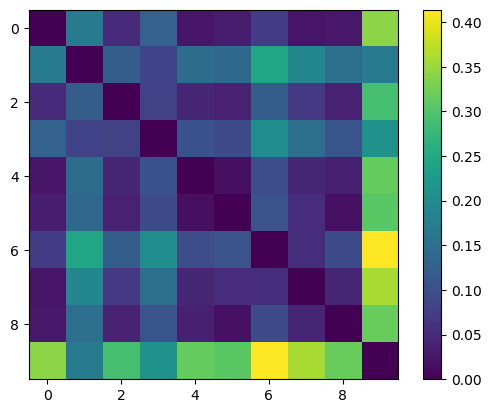

In [13]:
from itertools import combinations
h = np.zeros((10,10))
for i,j in combinations(idxs,2):
    h[idxs.index(i),idxs.index(j)] = persim.bottleneck(dgms[i],dgms[j])
plt.imshow(h+h.T)
plt.colorbar()